<a href="https://colab.research.google.com/github/GerasimGerasimov/generator-exciter-model/blob/main/ThreePhaseBridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

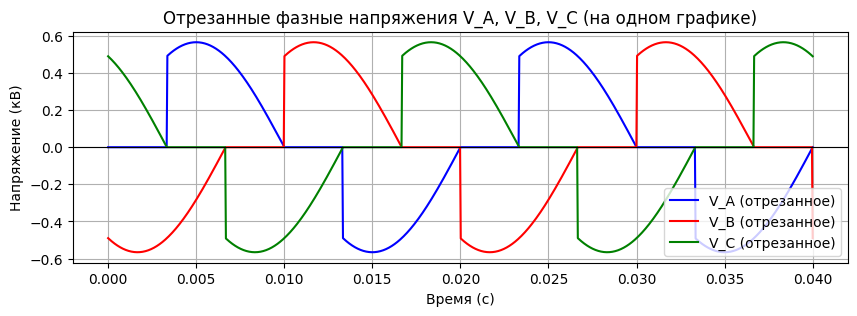

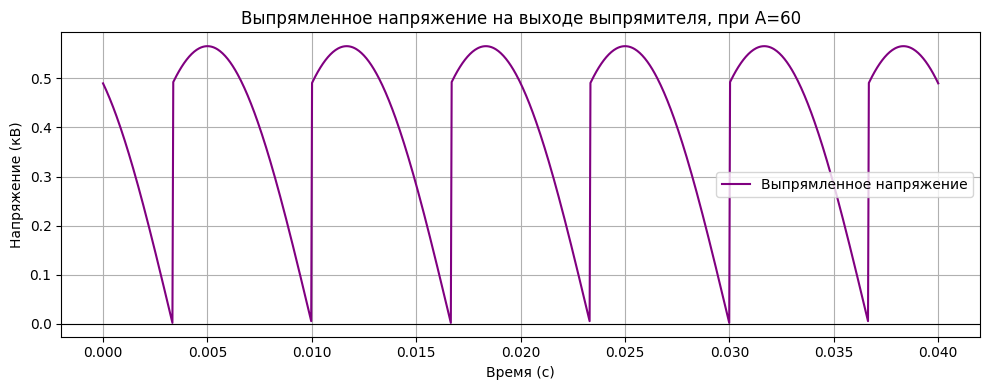

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
V_m = np.sqrt(2) * 0.4  # Амплитуда фазного напряжения (в кВ)
f = 50  # Частота (в Гц)
T = 1 / f  # Период (в секундах)
t = np.linspace(0, 2 * T, 1000)  # Временные точки для двух периодов
alpha_deg = 60  # Угол управления в градусах
alpha_rad = np.radians(alpha_deg)  # Перевод угла в радианы

# Трехфазное напряжение
V_A = V_m * np.sin(2 * np.pi * f * t)
V_B = V_m * np.sin(2 * np.pi * f * t - 2 * np.pi / 3)
V_C = V_m * np.sin(2 * np.pi * f * t + 2 * np.pi / 3)

# Применение отрезания напряжения
cut_time = alpha_rad / (2 * np.pi * f)  # Время задержки включения в каждом полупериоде

# Функция для обрезания: положительного и отрицательного полупериодов
def apply_cutoff(voltage, phase_shift):
    '''Функция для обрезания напряжения с учетом фазового сдвига'''
    # Сдвигаем время с учетом фазового сдвига
    phase_time = (t + phase_shift) % T

    # Обнуляем напряжение для положительного полупериода
    voltage_cut = np.where((phase_time < cut_time) & (voltage > 0), 0, voltage)

    # Обнуляем напряжение для отрицательного полупериода
    voltage_cut = np.where((phase_time > T / 2) & (phase_time < T / 2 + cut_time) & (voltage < 0), 0, voltage_cut)

    return voltage_cut

# Применяем отрезание напряжения для всех трёх фаз
V_A_cut = apply_cutoff(V_A, 0)                # Фаза A без сдвига
V_B_cut = apply_cutoff(V_B, -T / 3)           # Фаза B сдвинута на -T/3 (120° назад)
V_C_cut = apply_cutoff(V_C, +T / 3)           # Фаза C сдвинута на +T/3 (120° вперёд)

# Вычисление выпрямленного напряжения
V_rectified = np.maximum(V_A_cut, np.maximum(V_B_cut, V_C_cut))

# Построение графиков
plt.figure(figsize=(10, 3))

# Отображение всех трёх фаз на одном графике
plt.plot(t, V_A_cut, label='V_A (отрезанное)', color='blue')
plt.plot(t, V_B_cut, label='V_B (отрезанное)', color='red')
plt.plot(t, V_C_cut, label='V_C (отрезанное)', color='green')
plt.title('Отрезанные фазные напряжения V_A, V_B, V_C (на одном графике)')
plt.xlabel('Время (с)')
plt.ylabel('Напряжение (кВ)')
plt.grid()
plt.axhline(0, color='black', lw=0.8)
plt.legend()

# Построение выпрямленного напряжения на отдельном графике
plt.figure(figsize=(10, 4))
plt.plot(t, V_rectified, label='Выпрямленное напряжение', color='purple')
plt.title(f'Выпрямленное напряжение на выходе выпрямителя, при А={alpha_deg}')
plt.xlabel('Время (с)')
plt.ylabel('Напряжение (кВ)')
plt.grid()
plt.axhline(0, color='black', lw=0.8)
plt.legend()

plt.tight_layout()
plt.show()